In [16]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def custom_func(ln_x, ln_q):
    x_val = (np.exp(1.5/( ( 0.1 * ((ln_x + 7)**2) ) + 1) )/(np.log(np.exp(ln_q) + 0.007) + 5) + np.exp(-1*(ln_x+12)/5) + 1)*((np.exp(0.5*ln_q))) + 5
    return x_val



data = pd.read_csv("./vague_analysis/6-points.csv")
data_4 = pd.read_csv("./vague_analysis/4-points.csv")
data3 = pd.read_csv("./vague_analysis/linear.csv")
# data_lh = pd.read_csv("./vague_analysis/lhapdf_3d.csv")
data['6_point_interpolator'] = data['xf']
data['4_point_interpolator'] = data_4['xf']
data['linear_interpolator'] = data3['xf']
data_edge = pd.read_csv("./vague_analysis/slope-edge.csv")
data_avg = pd.read_csv("./vague_analysis/avg_slope_inter.csv")
data_mini_spline = pd.read_csv("./vague_analysis/slope_zero.csv")
data['edge_slope_interpolator'] = data_edge['xf']
data['avg_slope_interpolator'] = data_avg['xf']
data['mini_spline_interpolator'] = data_mini_spline['xf']
# data['lhapdf'] = data_lh['xf']
    
data.drop('xf', axis = 1)

data['actual_function'] = custom_func(data['lnx'],data['lnq'])

data['6_point_ratio'] = data['6_point_interpolator']/data['actual_function']
data['4_point_ratio'] = data['4_point_interpolator']/data['actual_function']
data['linear_ratio'] = data['linear_interpolator']/data['actual_function']
data['edge_ratio'] = data['edge_slope_interpolator']/data['actual_function']
data['avg_ratio'] = data['avg_slope_interpolator']/data['actual_function']
data['mini_spline_ratio'] = data['mini_spline_interpolator']/data['actual_function']

# data["lhapdf"] = data.lhapdf.astype(float)
# data['lhapdf_ratio'] = data['lhapdf']/data['actual_function']

data

lnx   lnq        xf  6_point_interpolator  4_point_interpolator  \
0      -18.00  0.50   10.8521               10.8521               10.8521   
1      -17.99  0.50   10.8438               10.8438               10.8438   
2      -17.98  0.50   10.8354               10.8354               10.8354   
3      -17.97  0.50   10.8270               10.8270               10.8270   
4      -17.96  0.50   10.8187               10.8187               10.8187   
...       ...   ...       ...                   ...                   ...   
341995  -0.05  9.95  173.7450              173.7450              173.7450   
341996  -0.04  9.95  173.7100              173.7100              173.7100   
341997  -0.03  9.95  173.6760              173.6760              173.6760   
341998  -0.02  9.95  173.6420              173.6420              173.6420   
341999  -0.01  9.95  173.6080              173.6080              173.6080   

        linear_interpolator  edge_slope_interpolator  avg_slope_interpolator  \
0                   10.8521                  10.8521                 10.3911   
1                   10.8438                  10.8438                 10.3827   
2                   10.8354                  10.8354                 10.3744   
3                   10.8270                  10.8270                 10.3661   
4                   10.8187                  10.8187                 10.3578   
...                     ...                      ...                     ...   
341995             173.7450                 173.7450              -3502.5200   
341996             173.7100                 173.7100              -3509.5300   
341997             173.6760                 173.6760              -3516.5500   
341998             173.6420                 173.6420              -3523.5800   
341999             173.6080                 173.6080              -3530.6100   

        mini_spline_interpolator  actual_function  6_point_ratio  \
0                        10.4784        10.808720       1.004013   
1                        10.4376        10.800253       1.004032   
2                        10.4012        10.791803       1.004040   
3                        10.3690        10.783370       1.004046   
4                        10.3408        10.774954       1.004060   
...                          ...              ...            ...   
341995                  183.4090       175.535121       0.989802   
341996                  183.6600       175.500955       0.989795   
341997                  183.9800       175.466872       0.989794   
341998                  184.3710       175.432871       0.989792   
341999                  184.8360       175.398953       0.989789   

        4_point_ratio  linear_ratio  edge_ratio  avg_ratio  mini_spline_ratio  
0            1.004013      1.004013    1.004013   0.961363           0.969439  
1            1.004032      1.004032    1.004032   0.961339           0.966422  
2            1.004040      1.004040    1.004040   0.961322           0.963806  
3            1.004046      1.004046    1.004046   0.961304           0.961573  
4            1.004060      1.004060    1.004060   0.961285           0.959707  
...               ...           ...         ...        ...                ...  
341995       0.989802      0.989802    0.989802 -19.953386           1.044856  
341996       0.989795      0.989795    0.989795 -19.997213           1.046490  
341997       0.989794      0.989794    0.989794 -20.041105           1.048517  
341998       0.989792      0.989792    0.989792 -20.085061           1.050949  
341999       0.989789      0.989789    0.989789 -20.129025           1.053803  

[342000 rows x 16 columns]

In [17]:
graphing = [data[i:i+1800].reset_index() for i in range(0,342000,1800)]
data2 = data.sort_values(['lnx','lnq'], ascending = True, ignore_index = True)
graphing2 = [data2[i:i+190].reset_index() for i in range(0,342000,190)]

In [18]:
graphing

[      index    lnx  lnq        xf  6_point_interpolator  4_point_interpolator  \
 0         0 -18.00  0.5  10.85210              10.85210              10.85210   
 1         1 -17.99  0.5  10.84380              10.84380              10.84380   
 2         2 -17.98  0.5  10.83540              10.83540              10.83540   
 3         3 -17.97  0.5  10.82700              10.82700              10.82700   
 4         4 -17.96  0.5  10.81870              10.81870              10.81870   
 ...     ...    ...  ...       ...                   ...                   ...   
 1795   1795  -0.05  0.5   6.71538               6.71538               6.71538   
 1796   1796  -0.04  0.5   6.71495               6.71495               6.71495   
 1797   1797  -0.03  0.5   6.71452               6.71452               6.71452   
 1798   1798  -0.02  0.5   6.71410               6.71410               6.71410   
 1799   1799  -0.01  0.5   6.71367               6.71367               6.71367   
 
       linear_

In [19]:
graphing2

[     index   lnx   lnq        xf  6_point_interpolator  4_point_interpolator  \
 0        0 -18.0  0.50   10.8521               10.8521               10.8521   
 1        1 -18.0  0.55   10.9990               10.9990               10.9990   
 2        2 -18.0  0.60   11.1458               11.1458               11.1458   
 3        3 -18.0  0.65   11.2926               11.2926               11.2926   
 4        4 -18.0  0.70   11.4395               11.4395               11.4395   
 ..     ...   ...   ...       ...                   ...                   ...   
 185    185 -18.0  9.75  582.2920              582.2920              582.2920   
 186    186 -18.0  9.80  595.3220              595.3220              595.3220   
 187    187 -18.0  9.85  608.3520              608.3520              608.3520   
 188    188 -18.0  9.90  621.3820              621.3820              621.3820   
 189    189 -18.0  9.95  634.4120              634.4120              634.4120   
 
      linear_interpolator 

In [22]:
ratio_list = ['6_point_ratio','4_point_ratio','linear_ratio','edge_ratio','avg_ratio','mini_spline_ratio']
interpolator_list = ['6_point_interpolator','4_point_interpolator','linear_interpolator','edge_slope_interpolator','avg_slope_interpolator','mini_spline_interpolator']
labels = ['6 point interpolator', '4 point interpolator', 'linear interpolator', 'edge slope interpolator', 'avg slope interpolator', 'mini spline interpolator']



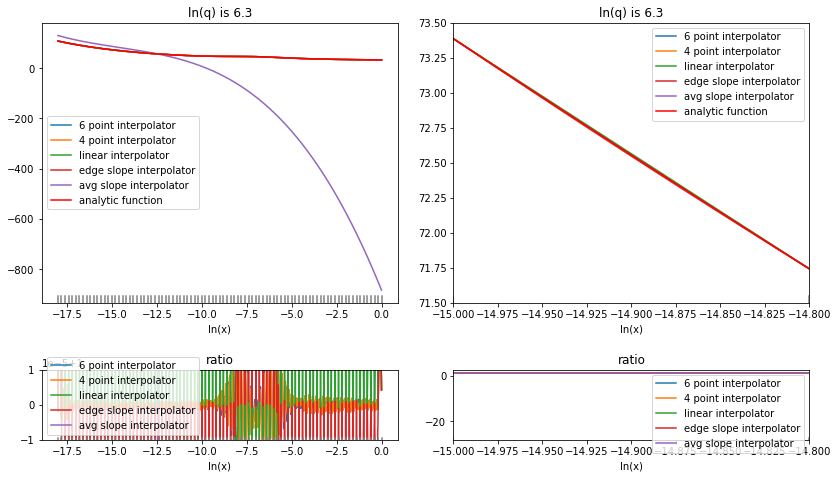

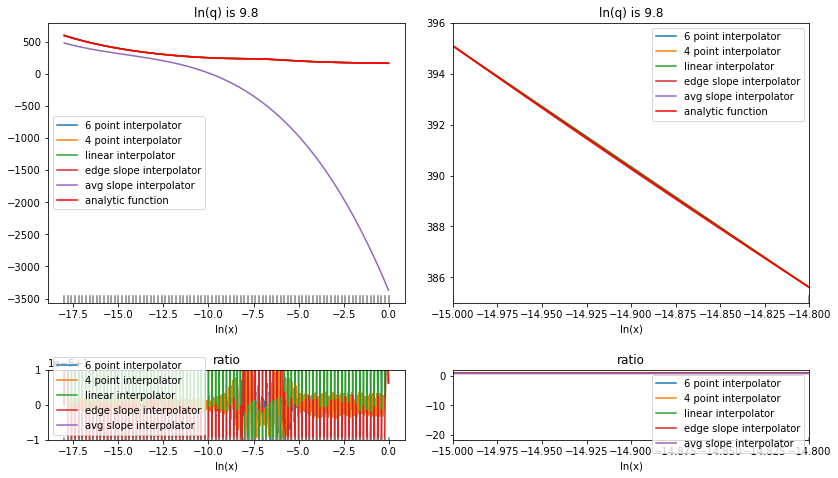

In [23]:
for dat in graphing:
    if(dat['lnq'][0]==9.8 or dat['lnq'][0]==6.3):
        figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
        figure.set_size_inches(12, 7)
        for index in range(0,5):
            axis[0,0].plot(dat['lnx'], dat[interpolator_list[index]] ,  label = labels[index])
        axis[0,0].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
#         axis[0,0].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,0].legend()
        axis[0,0].set(xlabel = "ln(x)")
        axis[0,0].set_title("ln(q) is " + str(dat['lnq'][0]))
#         print("ln(q) is " , (dat['lnq'][0]))

        i=-18
        while(i<0):
            axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        for index in range(0,5):
            axis[1,0].plot(dat['lnx'], dat[ratio_list[index]] ,    label = labels[index])
#         axis[1,0].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,0].legend()
        axis[1,0].set_title("ratio")
        axis[1,0].set(xlabel = "ln(x)")
#         plt.xlim(-15,-14.8)
        i=-18
        while(i<0):
            axis[1,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        axis[1,0].set_ylim([0.99999,1.00001])

#         SECOND PART
        for index in range(0,5):
            axis[0,1].plot(dat['lnx'], dat[interpolator_list[index]] ,   label = labels[index])
        axis[0,1].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
#         axis[0,1].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,1].legend()
        axis[0,1].set(xlabel = "ln(x)")
        axis[0,1].set_title("ln(q) is " + str(dat['lnq'][0]))
        axis[0,1].set_xlim([-15,-14.8])
        if(dat['lnq'][0]==6.3):
            axis[0,1].set_ylim([71.5,73.5])
        else:
            axis[0,1].set_ylim([385,396])

        i=-18
        while(i<0):
            axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        for index in range(0,5):
            axis[1,1].plot(dat['lnx'], dat[ratio_list[index]] ,   label = labels[index])
#         axis[1,1].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,1].set_title("ratio")
        axis[1,1].set(xlabel = "ln(x)")
        axis[1,1].set_xlim([-15,-14.8])
        axis[1,1].legend()
        i=-18
        while(i<0):
            axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
#         axis[1,1].set_ylim([0.9,1.1])
        figure.tight_layout(pad=2.0)
        plt.show()

NameError: name 'index2' is not defined

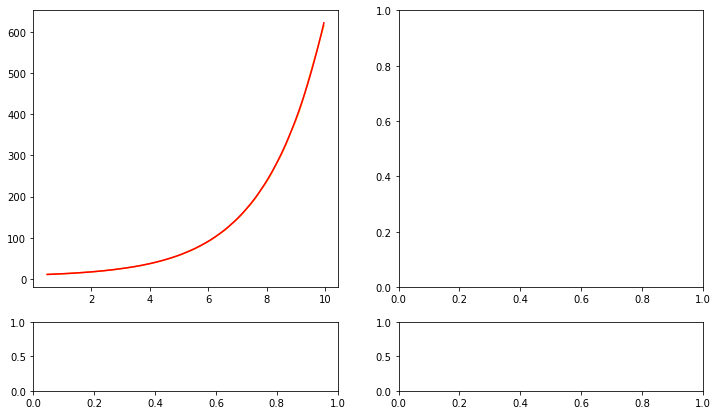

In [15]:
for dat in graphing2:
    if(dat['lnx'][0]==-17.8 or dat['lnx'][0]==-9.0):
        figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
        figure.set_size_inches(12, 7)
        axis[0,0].plot(dat['lnq'], dat[interpolator_list[index]] , color='orange',  label = labels[index])
        axis[0,0].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,0].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,0].legend()
        axis[0,0].set(xlabel = "ln(q)")
        axis[0,0].set_title("ln(x) is " + str(dat['lnx'][0]))
#         axis[0,0].set_ylim([-500,500])
#         print("ln(q) is " , (dat['lnq'][0]))

        i=0.3
        while(i<10):
            axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5

        axis[1,0].plot(dat['lnq'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,0].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,0].legend()
        axis[1,0].set_title("ratio")
        axis[1,0].set(xlabel = "ln(q)")
#         plt.xlim(-15,-14.8)
        i=0.3
        while(i<10):
            axis[1,0].axvline(x=i,ymax =0.025,color='grey')
            i+=0.5
        axis[1,0].set_ylim([0.999,1.001])

#         SECOND PART
        axis[0,1].plot(dat['lnq'], dat[interpolator_list[index]] , color='black',  label = labels[index])
        axis[0,1].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,1].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,1].legend()
        axis[0,1].set(xlabel = "ln(q)")
        axis[0,1].set_title("ln(x) is " + str(dat['lnx'][0]))
        axis[0,1].set_xlim([1.8,2.3])
        if(dat['lnx'][0]==-17.8):
            axis[0,1].set_ylim([15.5,19])
        else:
            axis[0,1].set_ylim([9.5,11.5])

        i=0.3
        while(i<10):
            axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5

        axis[1,1].plot(dat['lnq'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,1].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,1].legend()
        axis[1,1].set_title("ratio")
        axis[1,1].set(xlabel = "ln(q)")
        axis[1,1].set_xlim([1.8,2.3])
        i=0.3
        while(i<10):
            axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5
        axis[1,1].set_ylim([0.8,1.3])
        figure.tight_layout(pad=2.0)
        plt.show()

In [11]:
data[['lnx','lnq','6_point_ratio','linear_ratio']]

lnx   lnq  6_point_ratio  linear_ratio
0      -18.00  0.50       1.004013      1.004013
1      -17.99  0.50       1.004032      1.004032
2      -17.98  0.50       1.004040      1.004040
3      -17.97  0.50       1.004046      1.004046
4      -17.96  0.50       1.004060      1.004060
...       ...   ...            ...           ...
341995  -0.05  9.95       0.999612      0.989802
341996  -0.04  9.95       0.999609      0.989795
341997  -0.03  9.95       0.999606      0.989794
341998  -0.02  9.95       0.999602      0.989792
341999  -0.01  9.95       0.999598      0.989789

[342000 rows x 4 columns]

In [12]:
data_nonend = data[(data.lnq > 0.8) & (data.lnq < 9.3) & (data.lnx >-0.8000000000000305) & (data.lnx < -0.2000000000000305)]

In [13]:
data_nonend.max()

lnx                          -0.210000
lnq                           9.250000
xf                          127.594200
6_point_interpolator        127.594200
4_point_interpolator        127.594200
linear_interpolator         127.935000
edge_slope_interpolator     127.253000
avg_slope_interpolator      127.594200
mini_spline_interpolator    126.828000
lhapdf                      127.594200
actual_function             127.618050
6_point_ratio                 1.000337
4_point_ratio                 1.000314
linear_ratio                  1.007371
edge_ratio                    1.000004
avg_ratio                     1.000197
mini_spline_ratio             1.000004
lhapdf_ratio                  1.000197
dtype: float64

In [14]:
np.mean(np.abs(data_nonend['6_point_ratio'] - 1))

0.00015671590532782297

In [15]:
np.mean(np.abs(data_nonend['linear_ratio'] - 1))

0.003542972702001664

# marker


In [16]:
print(data_nonend['avg_ratio'].shape)
print(data_nonend['6_point_ratio'].shape)

(10140,)
(10140,)


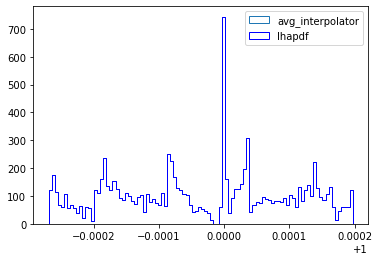

In [36]:
# _,bins,_ = plt.hist((data_nonend['6_point_ratio'] ), bins=50, histtype="step",  color = "orange")
plt.hist((data_nonend['avg_ratio'] ), bins=100, histtype="step", label = 'avg_interpolator')
plt.hist((data_nonend['lhapdf_ratio'] ), bins=100, histtype="step",color = "blue", label = 'lhapdf')
# range = (0.999,1.001),
plt.legend()
plt.show()

In [37]:
plt.hist((data_nonend['avg_ratio'] - 1), bins=50)

3.799965959945771e-05

In [38]:
np.mean(np.abs(data_nonend['edge_ratio'] - 1))

0.003612191600822583

(array([9060.,  240.,  240.,  180.,    0.,    0.,  120.,    0.,  120.,
         180.]),
 array([3.58170549e-09, 7.36732937e-04, 1.47346229e-03, 2.21019165e-03,
        2.94692100e-03, 3.68365036e-03, 4.42037971e-03, 5.15710907e-03,
        5.89383843e-03, 6.63056778e-03, 7.36729714e-03]),
 <BarContainer object of 10 artists>)

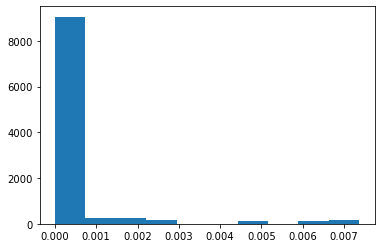

In [40]:
plt.hist(np.abs(data_nonend['6_point_ratio'] - 1))

- maximum-minimum point
- histogram
- some computation
- deviation